In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Data Ingestion

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/SHANIA/Downloads/Metro-Manila-Flood-Insights/Data/AEGISDataset.csv")
df.head(10)

,lat,lon,flood_heig,elevation,precipitat
0,14.640394,121.055708,0,54.553295,9.0
1,14.698299,121.002132,0,21.856272,10.0
2,14.698858,121.100261,0,69.322807,16.0
3,14.571310,120.983334,0,10.987241,8.0
4,14.762232,121.075735,0,87.889847,18.0
5,14.601178,121.088599,0,14.463734,11.0
6,14.708031,121.052674,0,45.000553,12.0
7,14.709206,121.050292,0,43.226852,13.0
8,14.709625,121.047006,0,43.183113,12.0
9,14.669338,121.132898,0,48.276211,17.0


In [4]:
df.shape

(3510, 5)

In [5]:
df.describe()

,lat,lon,flood_heig,elevation,precipitat
count,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000
mean,14.587452,121.044725,2.296296,15.935203,9.816239
std,0.076546,0.051857,1.879215,16.126777,2.523668
min,14.318917,120.901258,0.000000,0.000000,0.000000
25%,14.554644,121.004538,1.000000,6.804772,8.000000
50%,14.588837,121.051632,2.000000,9.745048,9.000000
75%,14.633395,121.087746,3.000000,15.439678,11.000000
max,14.807192,121.142470,8.000000,91.833778,21.000000


In [6]:
df.columns

Index(['lat', 'lon', 'flood_heig', 'elevation', 'precipitat'], dtype='object')

In [7]:
df.dtypes

lat           float64
lon           float64
flood_heig      int64
elevation     float64
precipitat    float64
dtype: object

In [8]:
df.isnull().sum()

lat           0
lon           0
flood_heig    0
elevation     0
precipitat    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(2)

#### Univariate Analysis (Numeric & Categorical)

Numeric Columns: elevation, precipitation

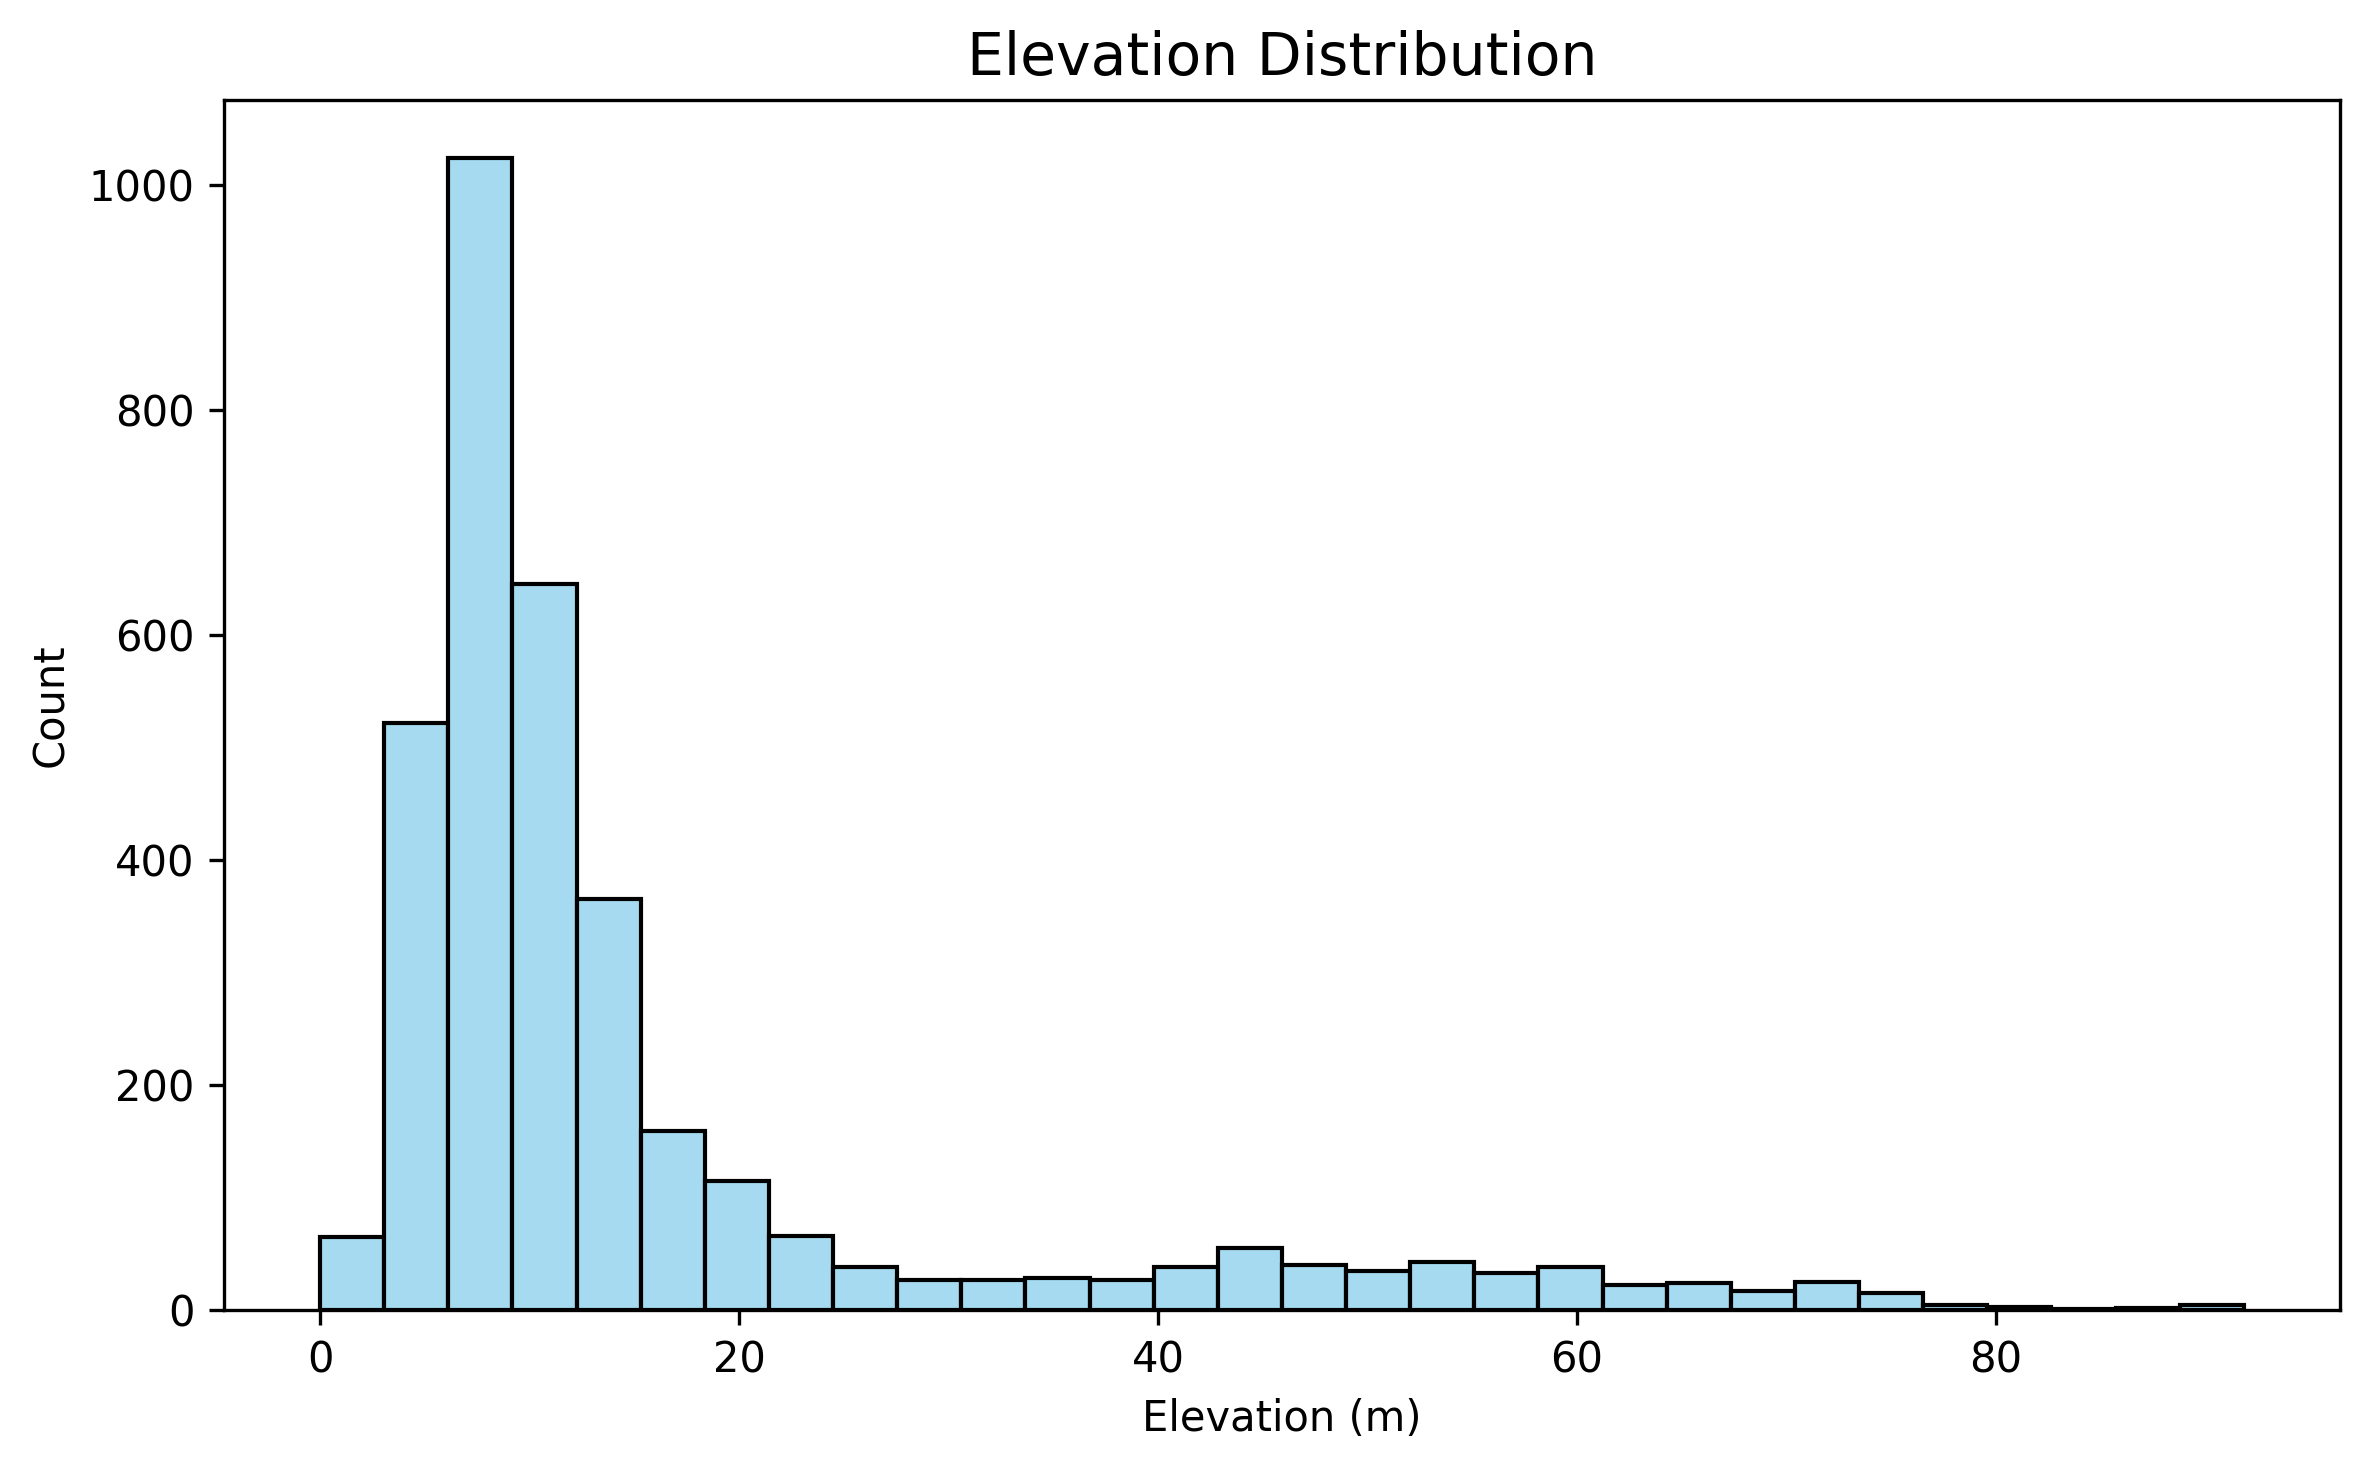

In [10]:
plt.figure(figsize=(8,5), dpi=300)
sns.histplot(df['elevation'], bins=30, color='skyblue', edgecolor='black')
plt.title("Elevation Distribution", fontsize=14)
plt.xlabel("Elevation (m)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Categorical Column: flood_heig

C:\Users\SHANIA\AppData\Local\Temp\ipykernel_20660\3537774644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='flood_heig', data=df, palette='Blues')


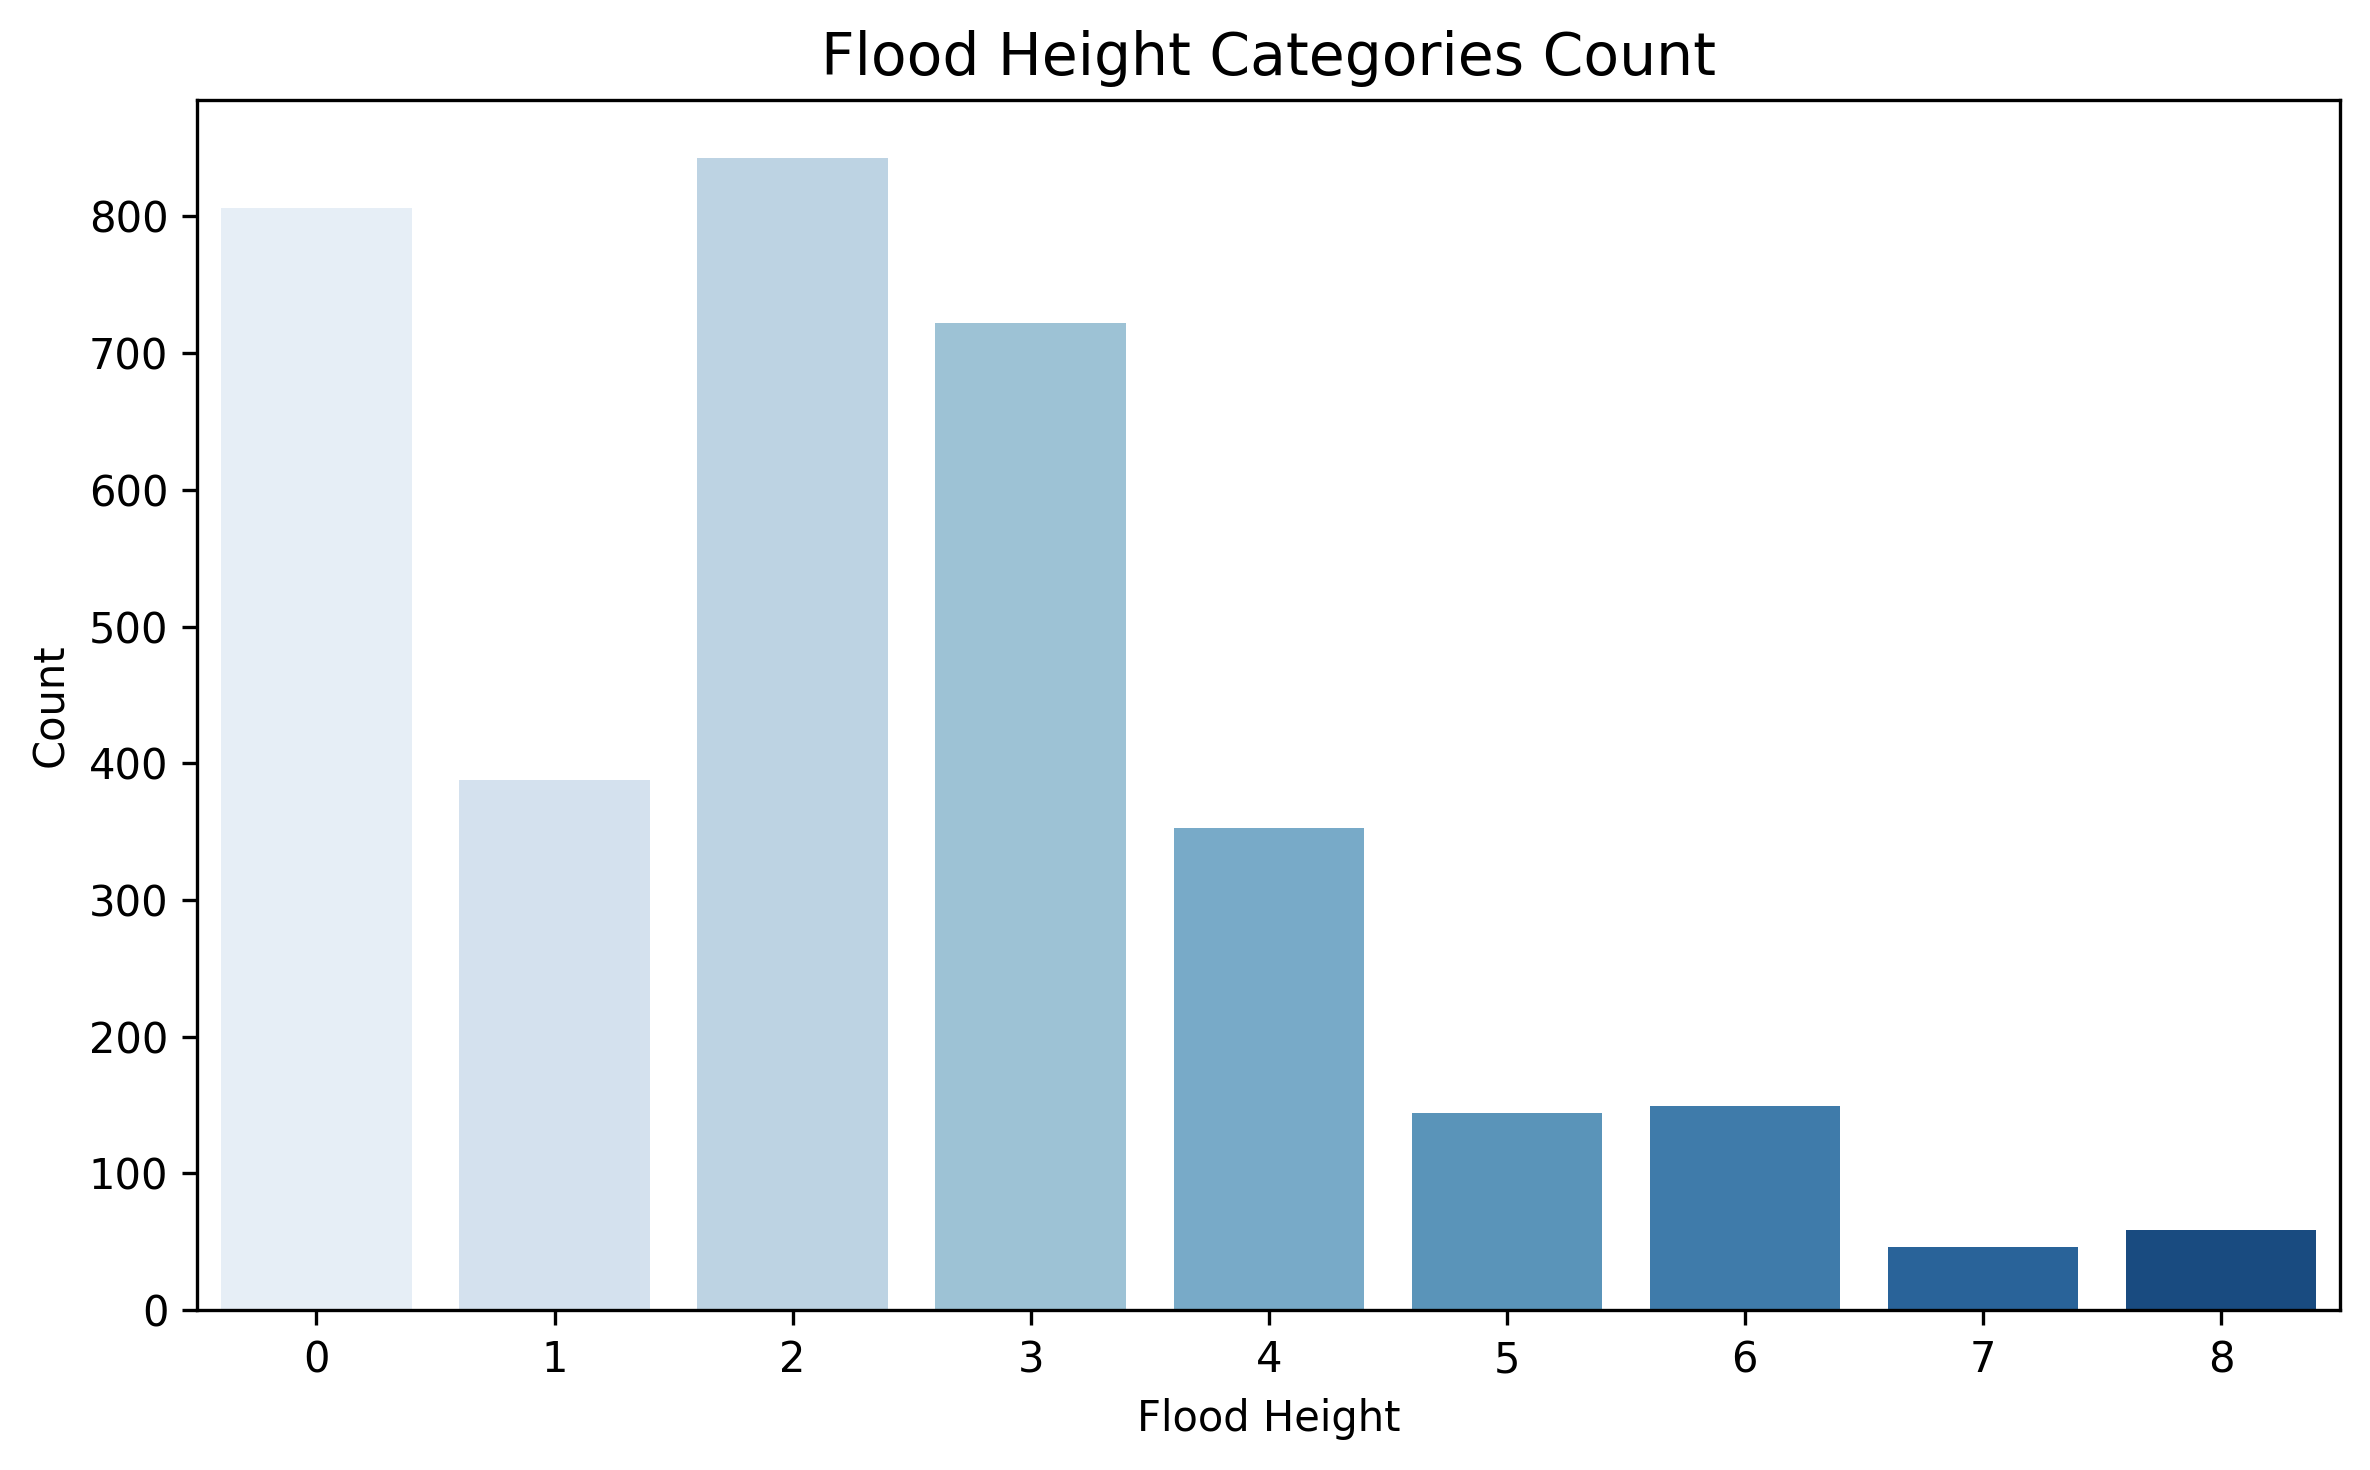

In [11]:
plt.figure(figsize=(8,5), dpi=300)
sns.countplot(x='flood_heig', data=df, palette='Blues')
plt.title("Flood Height Categories Count", fontsize=14)
plt.xlabel("Flood Height")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Bivariate Analysis

Flood Height vs Elevation

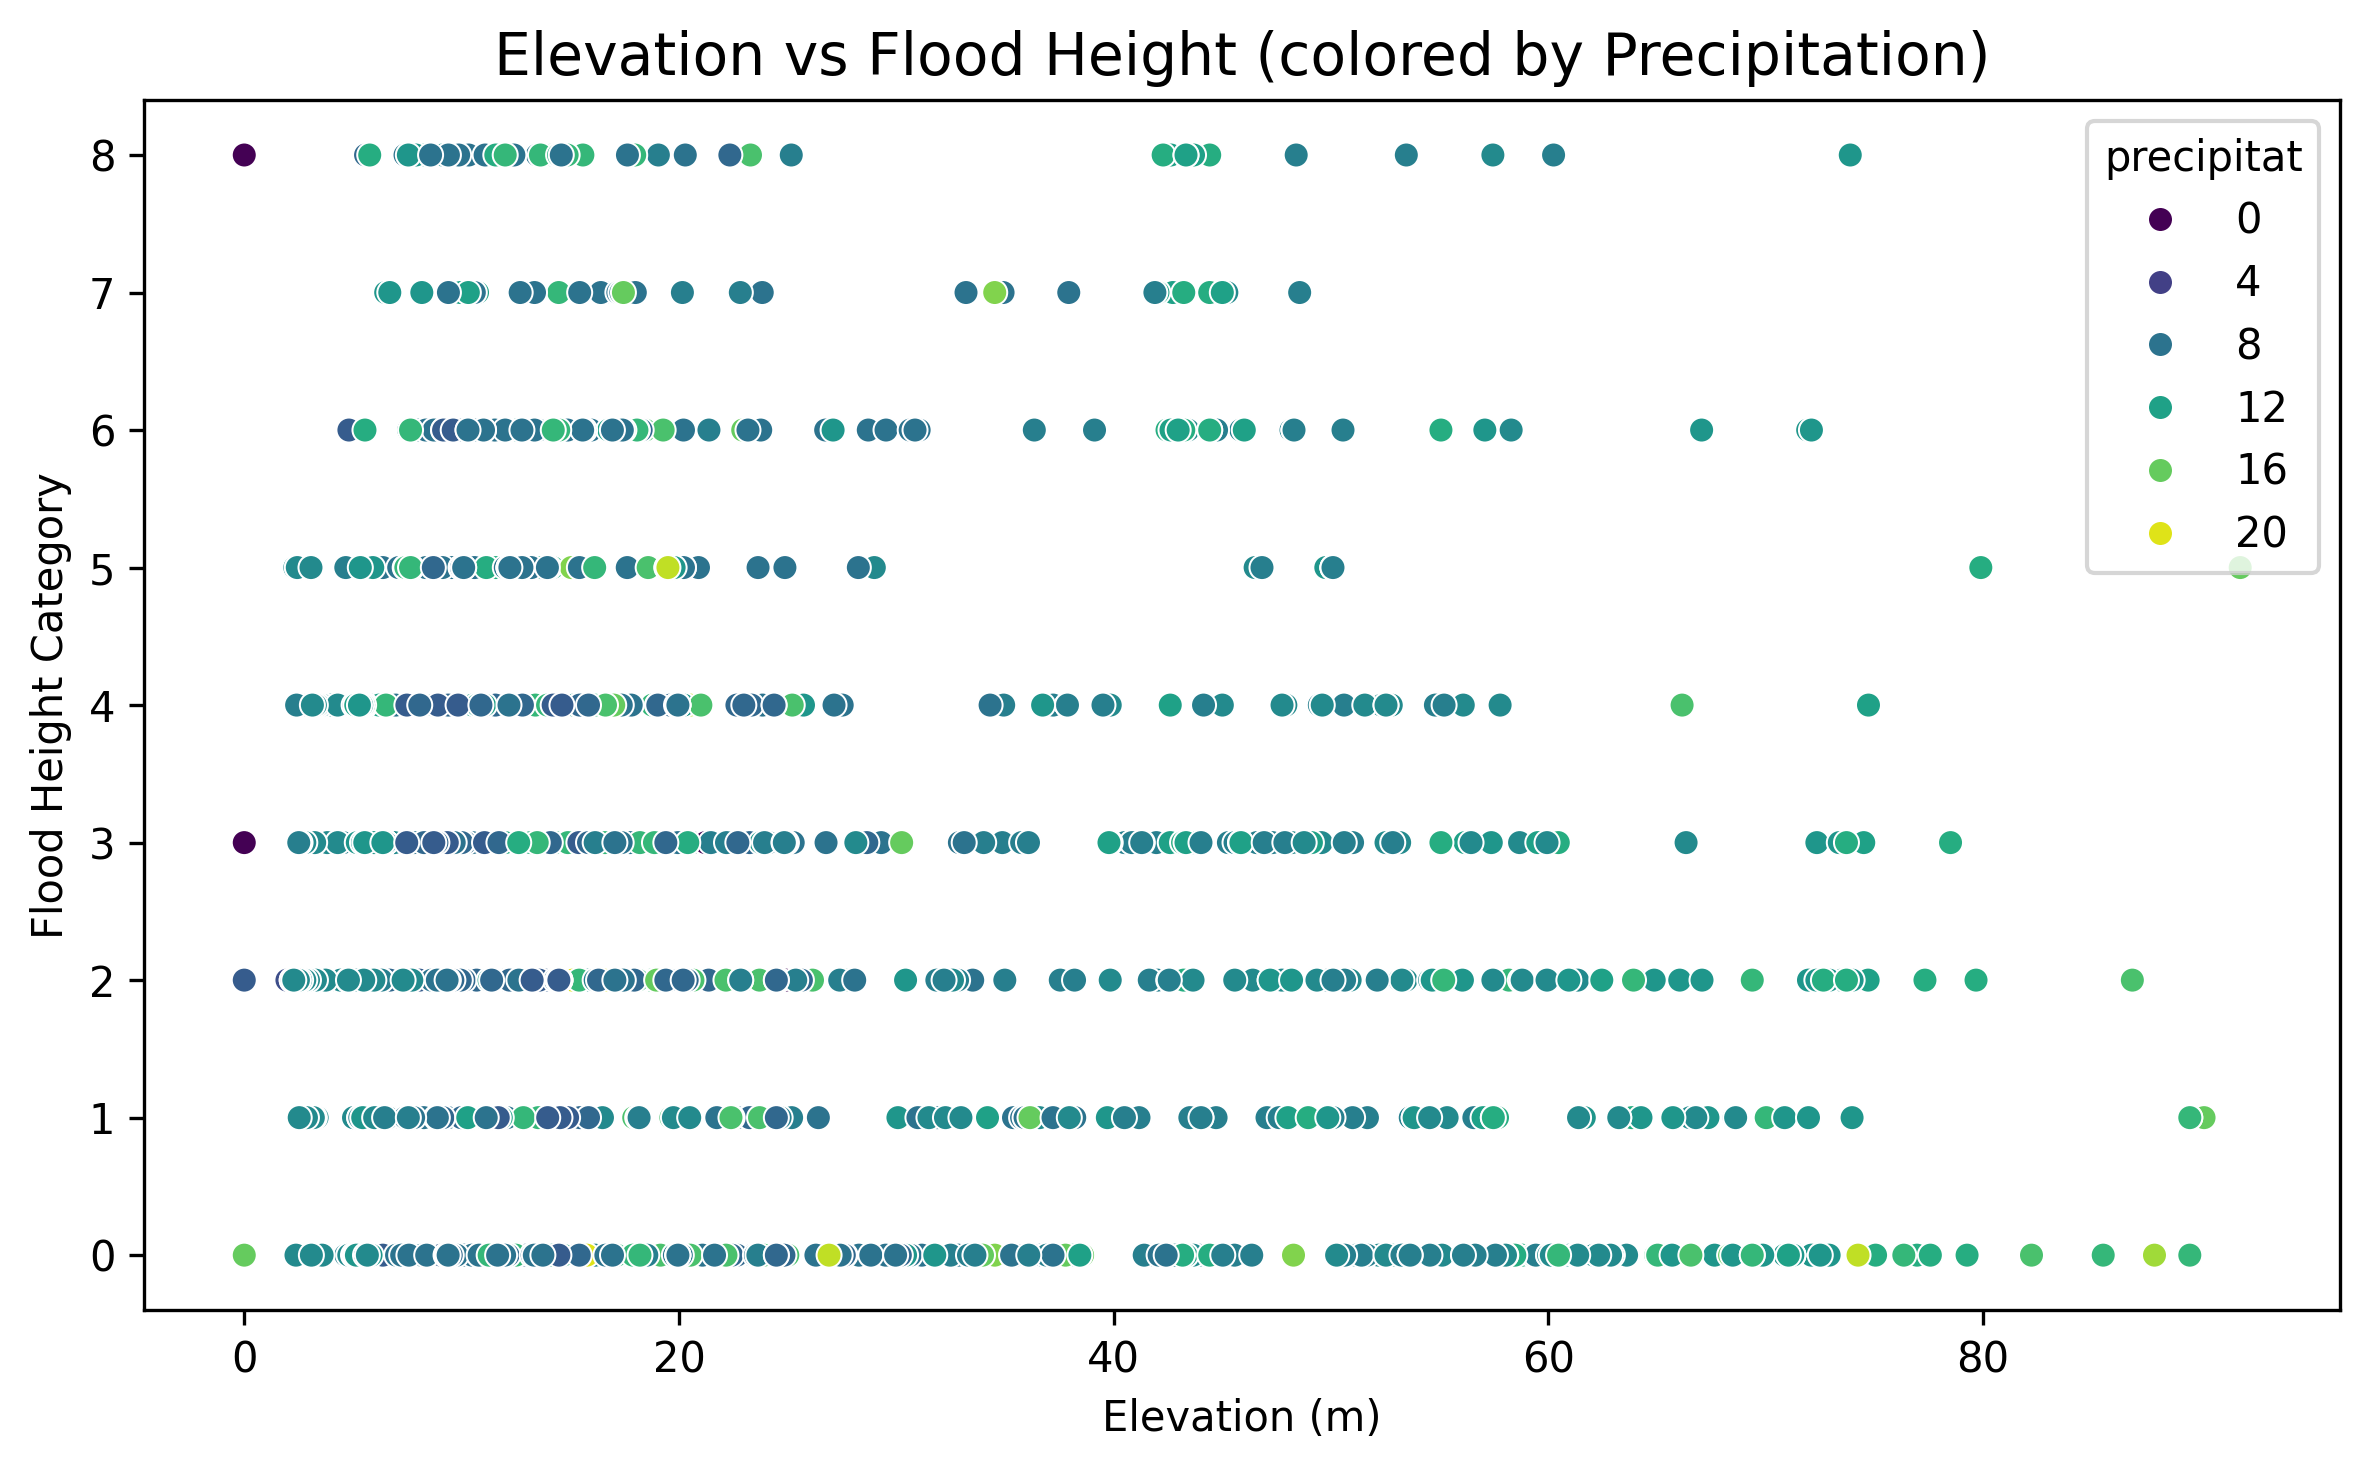

In [12]:
plt.figure(figsize=(8,5), dpi=300)
sns.scatterplot(data=df, x='elevation', y='flood_heig', hue='precipitat', palette='viridis')
plt.title("Elevation vs Flood Height (colored by Precipitation)", fontsize=14)
plt.xlabel("Elevation (m)")
plt.ylabel("Flood Height Category")
plt.tight_layout()
plt.show()

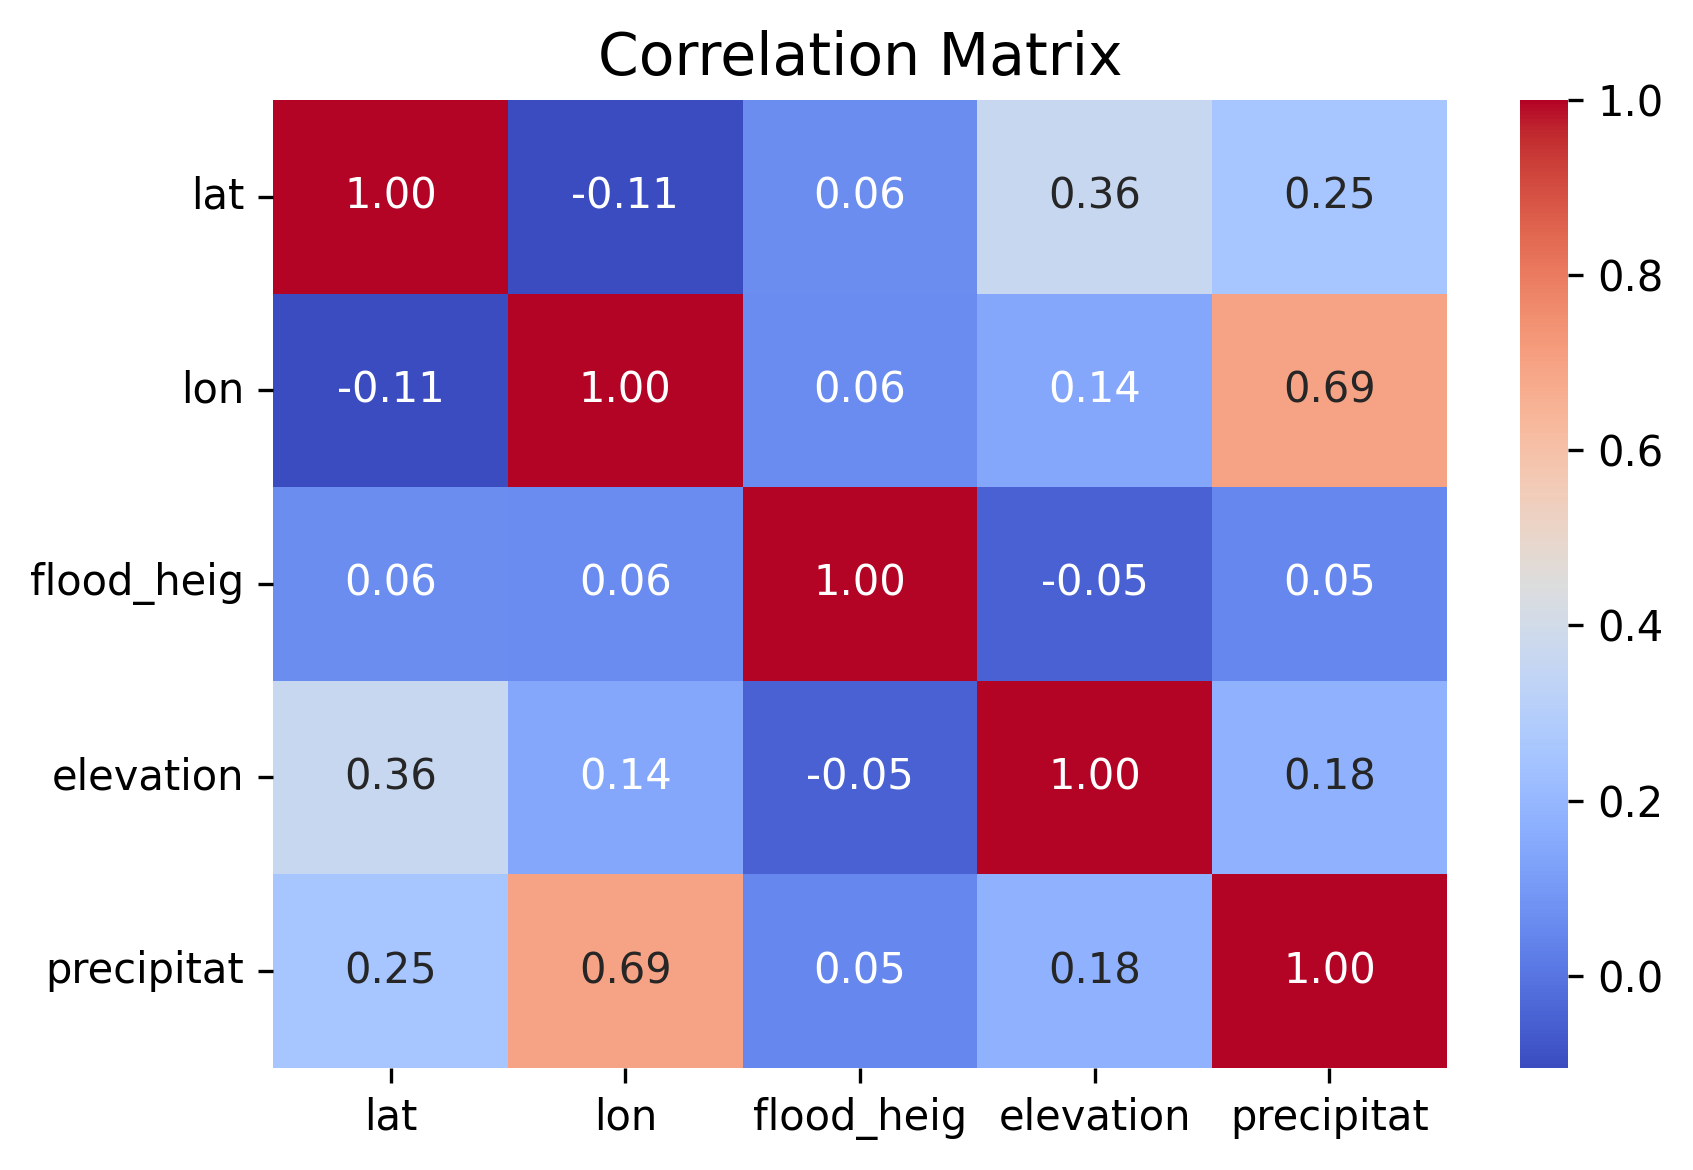

In [13]:
plt.figure(figsize=(6,4), dpi=300)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


In [14]:
numeric_cols = ['elevation', 'precipitat']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"{col} potential outliers: {len(outliers)}")


elevation potential outliers: 503
precipitat potential outliers: 62


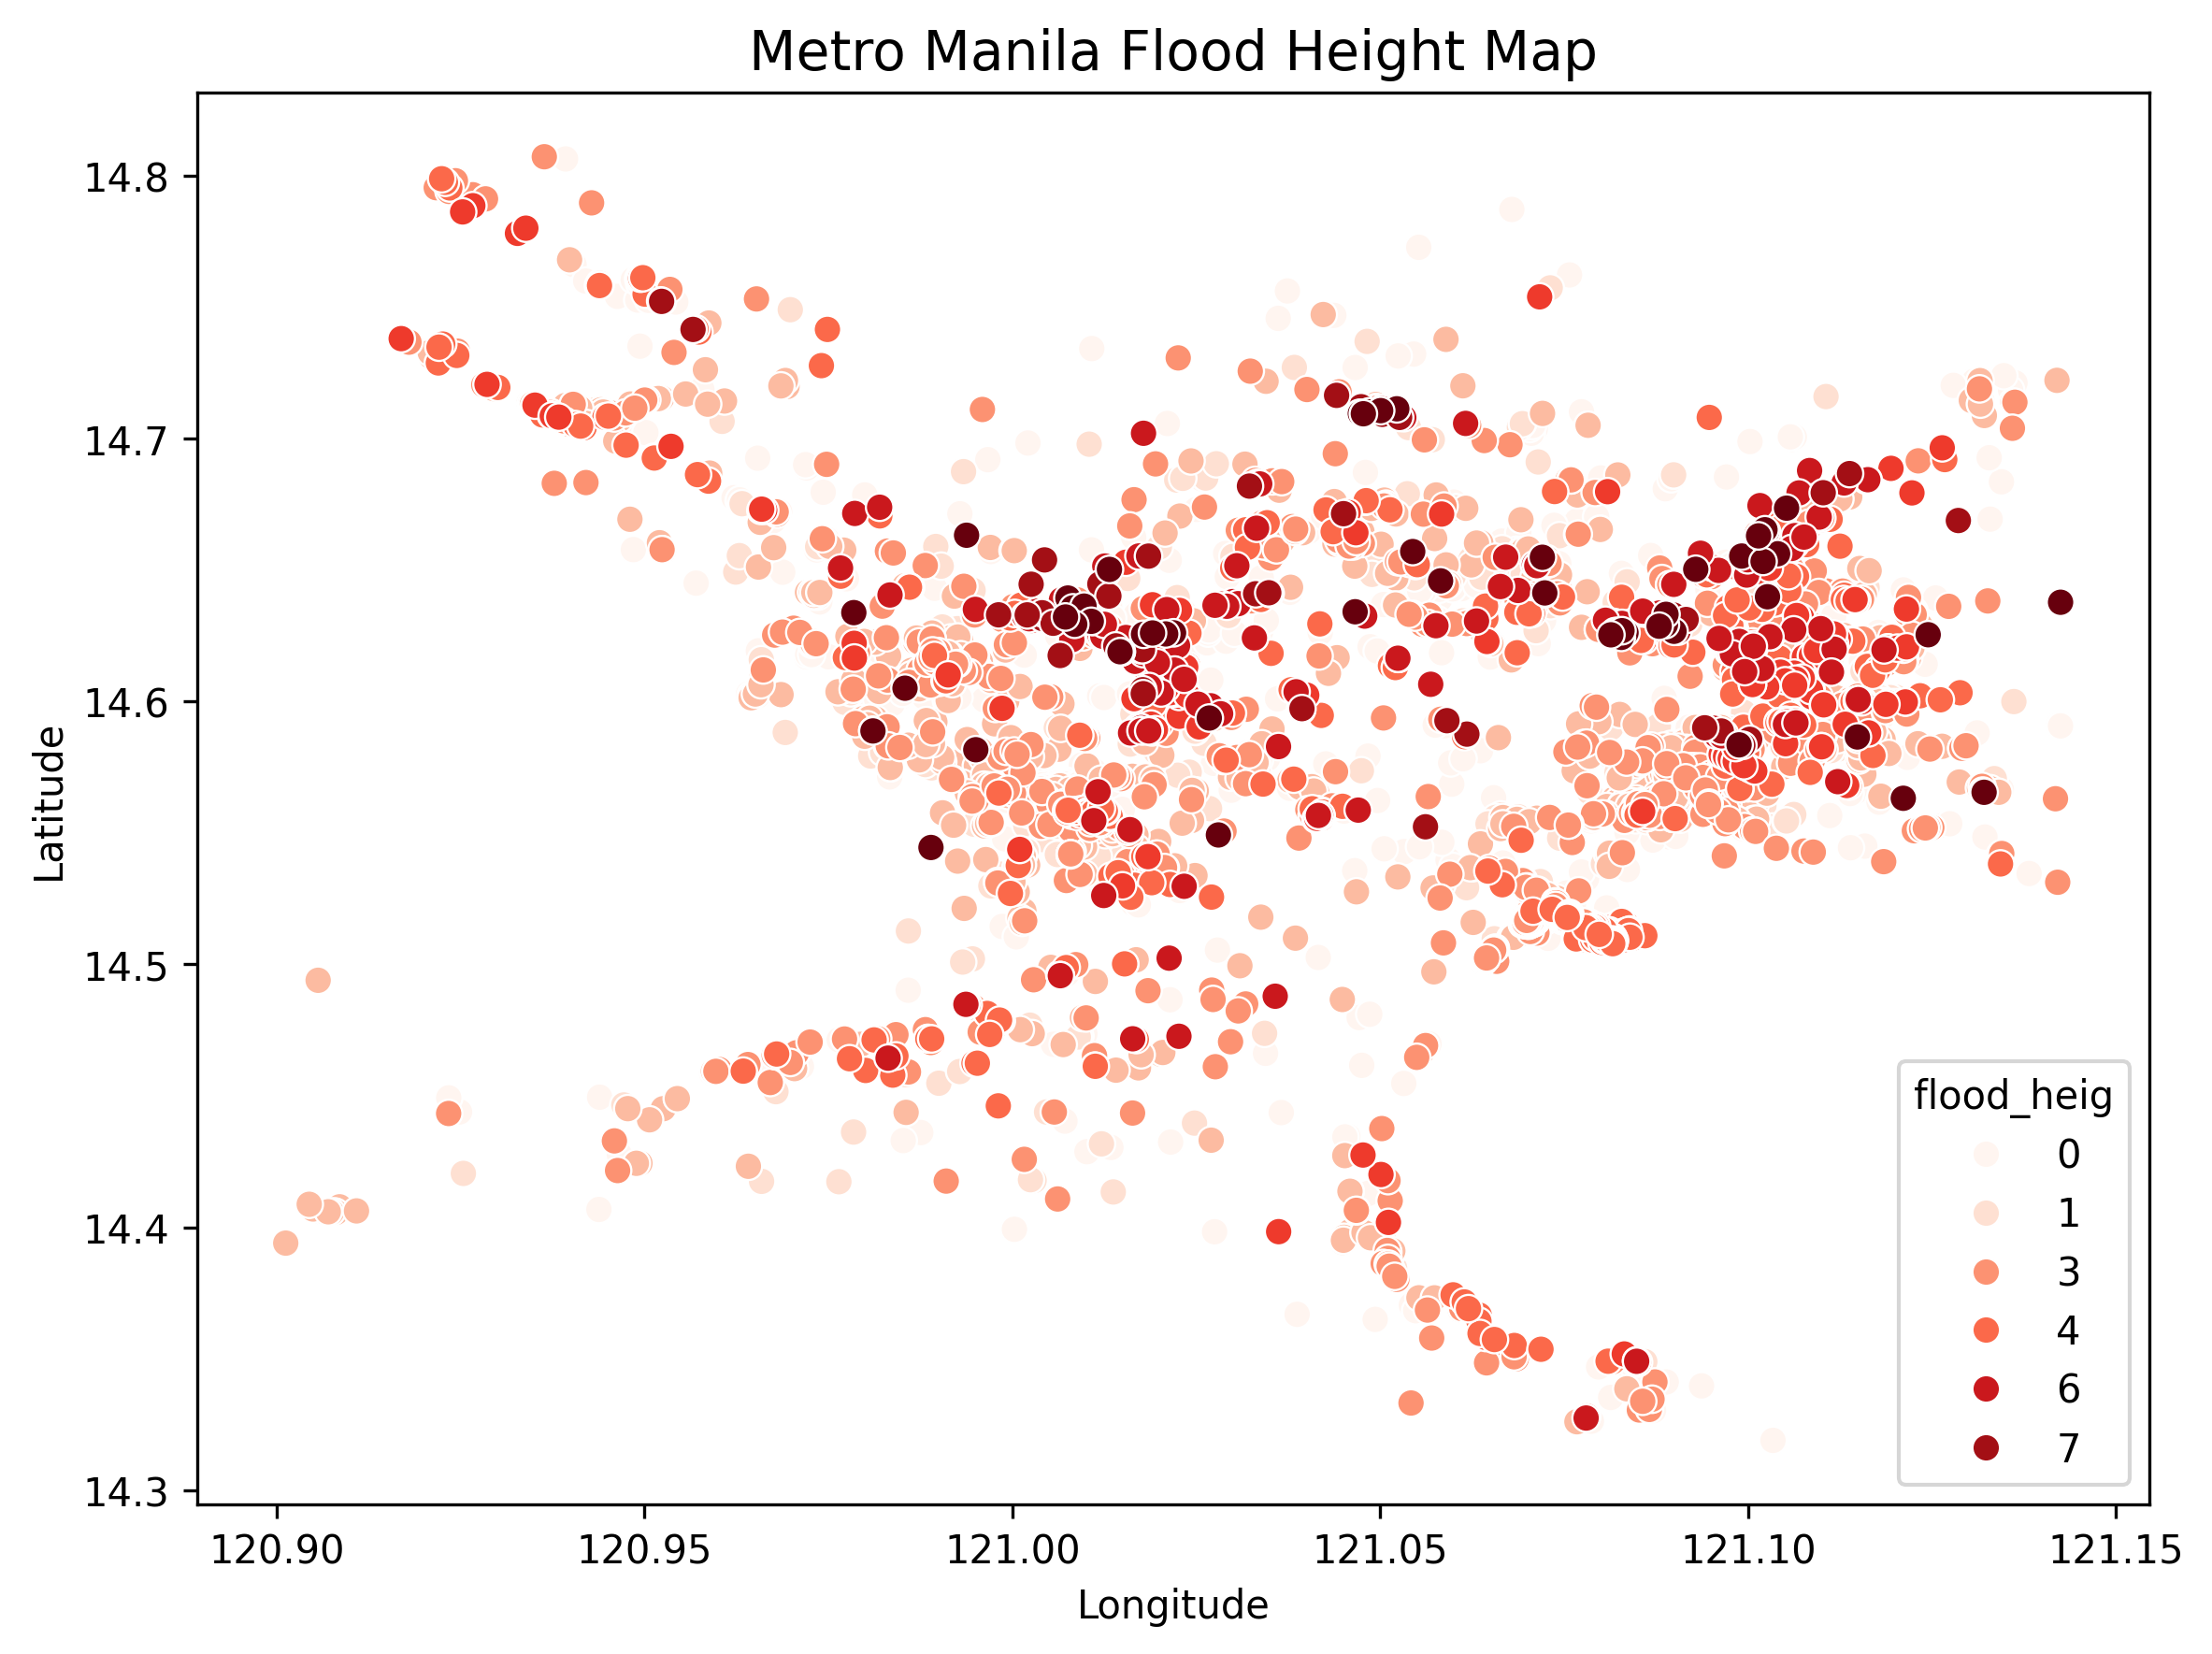

In [15]:
plt.figure(figsize=(8,6), dpi=300)
sns.scatterplot(data=df, x='lon', y='lat', hue='flood_heig', palette='Reds', s=50)
plt.title("Metro Manila Flood Height Map", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()